In [1]:
import pixellib
from pixellib.semantic import semantic_segmentation
import cv2
import numpy as np
import matplotlib.pyplot as plt
from blend_modes import soft_light

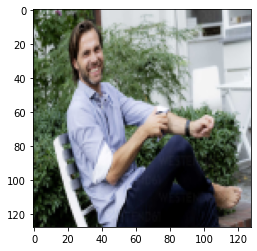

In [80]:
img = cv2.imread('chair_man.jpg')
img = cv2.resize(img,(128,128),interpolation=cv2.INTER_AREA)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

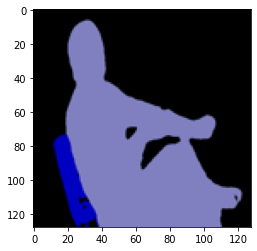

In [3]:
segment_pic = semantic_segmentation()
segment_pic.load_pascalvoc_model("deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
labels,frame=segment_pic.segmentAsPascalvoc(img,process_frame=True)
plt.imshow(frame)

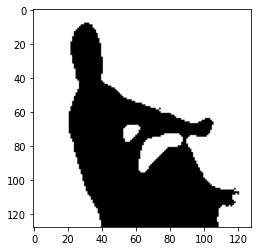

In [4]:
seg_image = cv2.inRange(frame,np.array([128,128,192]),np.array([128,128,192]))
seg_image = cv2.cvtColor(seg_image,cv2.COLOR_BGR2RGB)
seg_image = 255- seg_image
plt.imshow(seg_image)

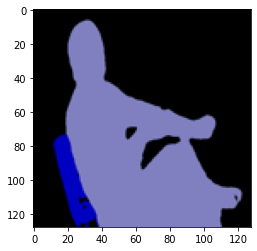

In [5]:
plt.imshow(frame)

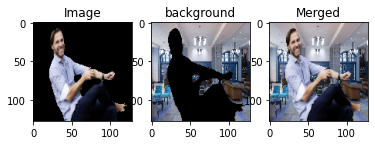

In [55]:
back = cv2.imread('background3.jpg')
back = cv2.resize(back,(128,128))

masked_image = cv2.resize(seg_image, (128,128))
masked_image[seg_image != 0] = 0

back[seg_image == 0] = 0
img[seg_image!=0]=0

plt.subplot(131)
plt.imshow(img)
plt.title('Image')

plt.subplot(132)
plt.imshow(back)
plt.title('background')

plt.subplot(133)
plt.imshow(back+img)
plt.title('Merged')

plt.show()
# print('comng to')
# full_image = back+img
# plt.imshow(full_image)

In [67]:
from PIL import Image
def composite(background, foreground, alphamask):
    "pastes the foreground image into the background image using the mask"
    # remember the old datatype
    old_type = background.dtype
    # Convert uint8 to float
    foreground = foreground.astype(float)
    background = background.astype(float)
    # Normalize the alpha mask to keep intensity between 0 and 1
    alphamask = alphamask.astype(float)/255
    # Multiply the foreground with the alpha matte
    foreground = cv2.multiply(alphamask, foreground)
    # Multiply the background with ( 1 - alpha )
    background = cv2.multiply(1.0 - alphamask, background)
    # Add the masked foreground and background
    outImage = cv2.add(foreground, background)
    outImage = outImage/255
    # convert it back to old format
    outImage = outImage*255
    outImage = outImage.astype(old_type)
    return outImage

In [95]:
foreground = np.copy(img).astype(float)

back = cv2.imread('background3.jpg')
back = cv2.resize(back,(128,128))

background = np.copy(back).astype(float)
x= np.copy(frame)
x[x!=255]=0
alpha = x
alpha = alpha.astype(float)/255

foreground = cv2.multiply(alpha, foreground)
background = cv2.multiply(1.0 - alpha, background)

outImage = cv2.add(foreground, background)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


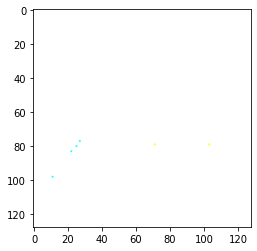

In [98]:
plt.imshow(background)

In [42]:
tmp = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(img)
rgba = [b,g,r, alpha]
dst = cv2.merge(rgba,4)
# dst=cv2.cvtColor(dst,cv2.COLOR_RGBA2RGB)

In [43]:
tmp = cv2.cvtColor(back, cv2.COLOR_RGB2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(back)
rgba = [b,g,r, alpha]
dst1 = cv2.merge(rgba,4)
# dst=cv2.cvtColor(dst,cv2.COLOR_RGBA2RGB)

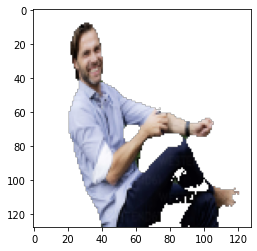

In [45]:
plt.imshow(dst)

In [7]:
img1 = (cv2.cvtColor(img,cv2.COLOR_RGB2RGBA)).astype(float)
back1 = (cv2.cvtColor(back,cv2.COLOR_RGB2RGBA)).astype(float)

print(f'the shape of img1 is {img1.shape} and shape of back1 is {back1.shape}')

the shape of img1 is (128, 128, 4) and shape of back1 is (128, 128, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'background')

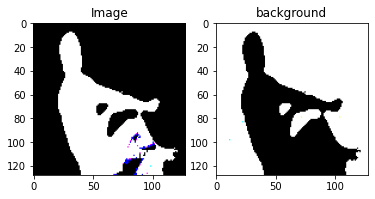

In [15]:
plt.subplot(121)
plt.imshow(img1)
plt.title('Image')

plt.subplot(122)
plt.imshow(back1)
plt.title('background')

In [50]:
blended_img_float = soft_light(dst1.astype(float), dst.astype(float), 0.7)

In [51]:
blended_img_float.shape

(128, 128, 4)

In [52]:
# blended_img_float = cv2.cvtColor(blended_img_float.astype(np.uint8),cv2.COLOR_RGBA2RGB)
# blended_img_float.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


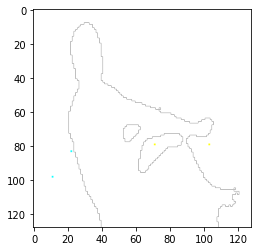

In [53]:
plt.imshow(blended_img_float)

In [15]:
blended_img_uint8 = blended_img_float.astype(np.uint8)  # Convert image to OpenCV native display format
cv2.imshow('window', blended_img_uint8)
cv2.waitKey()  # Press a key to close window with the image.

100